In [1]:
# from datetime import datetime as dt
# from collections import Counter

In [1]:
import sys

In [9]:
def eliminate(remove_digit, binaries, d):
    # removes elements with value
    # remove_digit in position d
    remove = set()
    for b in binaries:
        if int(b[d]) == remove_digit:
            remove.add(b)
    print(remove)
    return binaries - remove

def count_digit(binaries, d):
    # counts digits at position d
    # and returns the most common
    ones = 0
    for b in binaries:
        if int(b[d]) == 1:
            ones += 1
    return ones >= len(binaries)/2

In [10]:
binaries = {'001010101110'}

In [11]:
count_digit(binaries, 0)

False

In [13]:
eliminate(1, binaries, 0)

set()


{'001010101110'}

In [3]:
# we want segments of the data
# low, medium, high socioeconomic background
# how much they consume relatively 
# seasons?

In [ ]:
# households in treatment are they even in data for 2012?
# do you cut households that consumed in the top / bottom 5% or sth?
# what if you take the intersection of the N2 and N1 -- keep only datapoints that are present in both
# sule weather data

In [6]:
def household_mean_daily_consumption(df):
    df = df.groupby([df['date_time'].dt.normalize(), df['house_id']]).sum().rename(columns={'KWH/hh': 'KWH/D'})
    df['treated'] = df['treated'].astype('bool')
    df = df.groupby([df.index.get_level_values(0), 'treated']).mean()
    return df['KWH/D'].unstack()

In [7]:
# returns annual consumption by the treatment group and control group, respectively
def annual_consumption(df):
    df = df.groupby([df['date_time'].dt.year, df['house_id']]).sum().rename(columns={'KWH/hh': 'KWH/Y'})
    df['treated'] = df['treated'].astype('bool')
    df = df.groupby([df.index.get_level_values(0), 'treated']).mean()
    df = df['KWH/Y'].unstack()
    return df[True].values[0], df[False].values[0]

In [8]:
def get_consumption_demographic(df, dem):
    dem_df = df.loc[df['acorn_category'] == dem].reset_index(drop=True)
    dem_df.reset_index(drop=True, inplace=True)
    return dem_df

In [9]:
def plot_1213(df1, df2, labels, title): 
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df1[True].index, df1[True].values, label=labels[0], marker='.')
    ax.plot(df1[False].index, df1[False].values, label=labels[1], marker='.')
    ax.plot(df2[True].index, df2[True].values, label=labels[2], marker='.')
    ax.plot(df2[False].index, df2[False].values, label=labels[3], marker='.')

    ax.legend(loc=1); # upper left corner
    ax.set_xlabel('date')
    ax.set_ylabel('mean total consumption per day - KWH/D')
    ax.set_title(title);

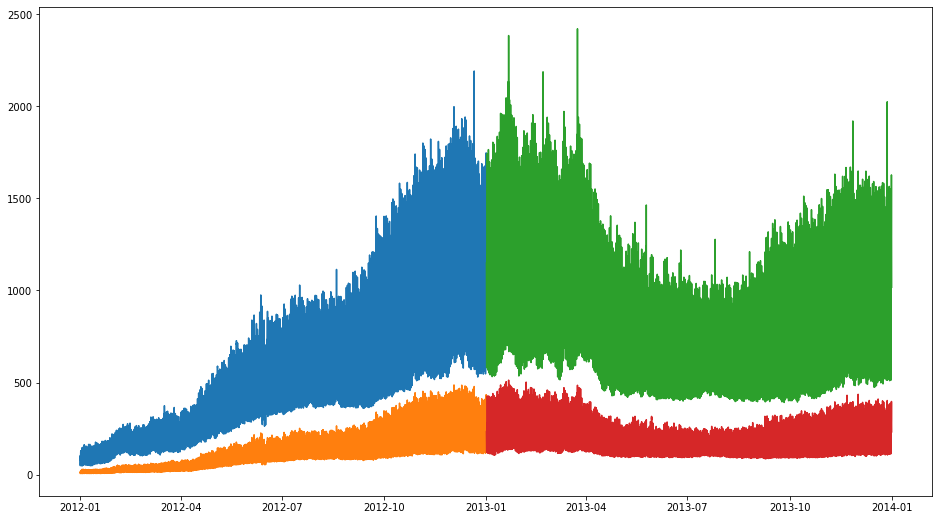

In [9]:
plt.figure(figsize=(16, 9))
plt.plot(hourly_sum_2012.index, hourly_sum_2012['KWH/hh', False].values)
plt.plot(hourly_sum_2012.index, hourly_sum_2012['KWH/hh', True].values)
plt.plot(hourly_sum_2013.index, hourly_sum_2013['KWH/hh', False].values)
plt.plot(hourly_sum_2013.index, hourly_sum_2013['KWH/hh', True].values)
plt.show()

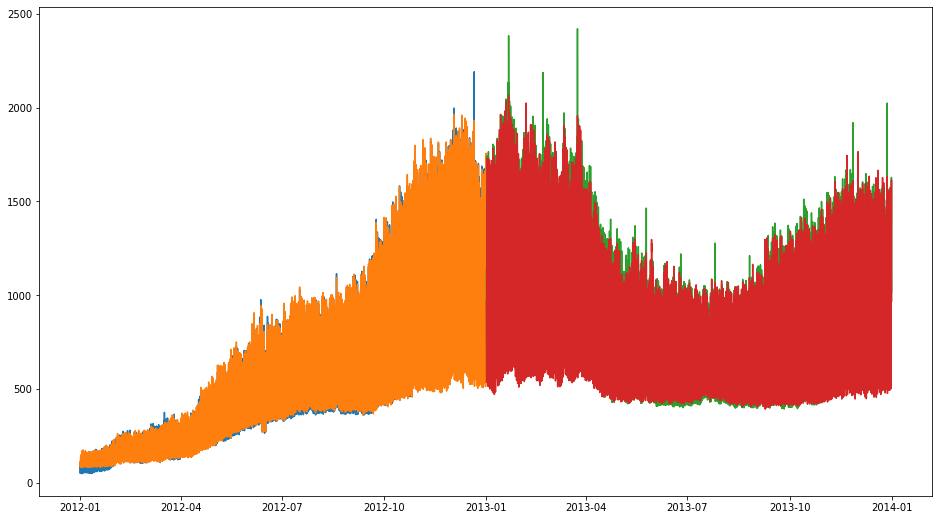

In [13]:
plt.figure(figsize=(16, 9))
plt.plot(hourly_sum_2012.index, hourly_sum_2012['KWH/hh', False].values)
plt.plot(hourly_sum_2012.index, Y_pred_2012)
plt.plot(hourly_sum_2013.index, hourly_sum_2013['KWH/hh', False].values)
plt.plot(hourly_sum_2013.index, Y_pred_2013)
plt.show()

In [35]:
diff_2012 = hourly_sum_2012['KWH/hh', False].values - Y_pred_2012.T[0]
diff_2013 = hourly_sum_2013['KWH/hh', False].values - Y_pred_2013.T[0]

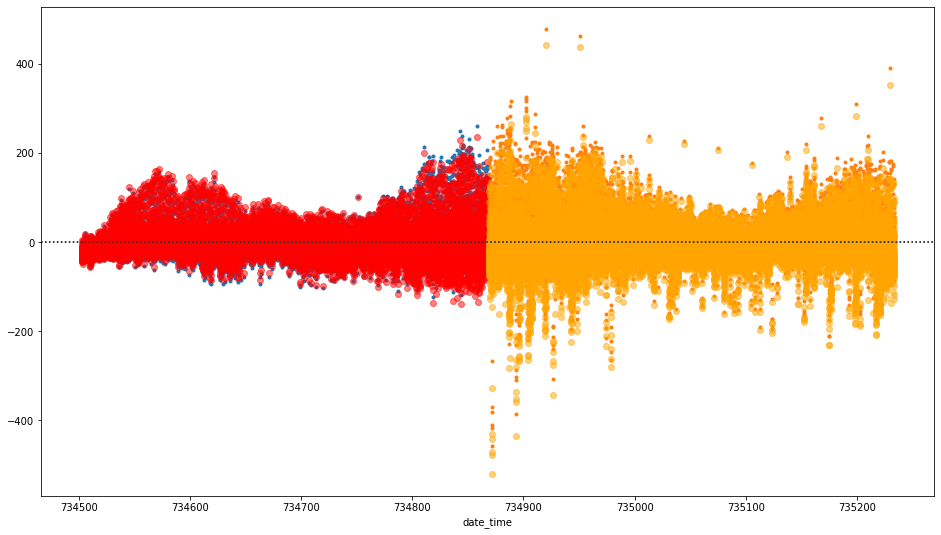

In [61]:
plt.figure(figsize=(16, 9))

y1 = diff_2012
x1 = hourly_sum_2012.index
x1 = x1.map(dt.toordinal)
plt.scatter(x1, y1, marker='.')
sns.residplot(x=x1, y=y1, order=2, scatter_kws={'color': 'red', 'alpha': 0.5})

y2 = diff_2013
x2 = hourly_sum_2013.index
x2 = x2.map(dt.toordinal)
plt.scatter(x2, y2, marker='.')
sns.residplot(x=x2, y=y2, order=2, scatter_kws={'color': 'orange', 'alpha': 0.5})

plt.show()

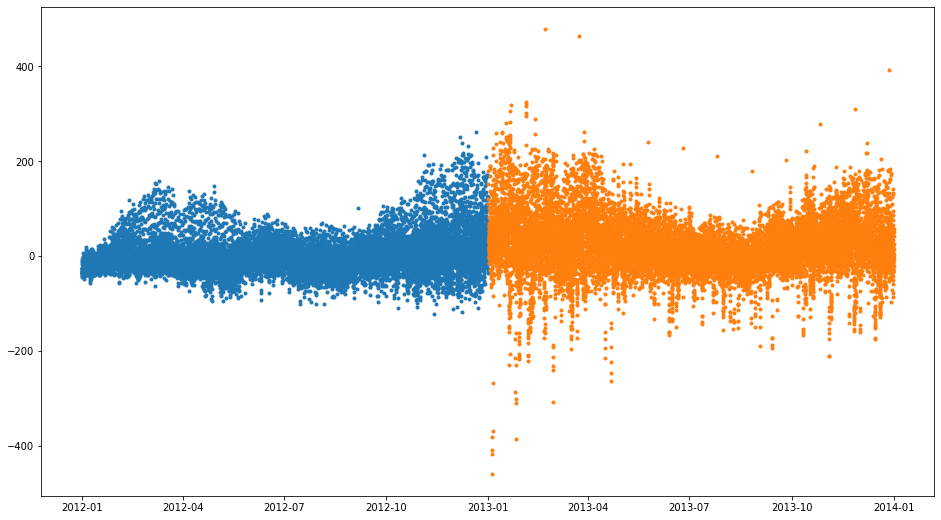

In [62]:
plt.figure(figsize=(16, 9))
plt.scatter(hourly_sum_2012.index, diff_2012, marker='.')
plt.scatter(hourly_sum_2013.index, diff_2013, marker='.')
plt.show()

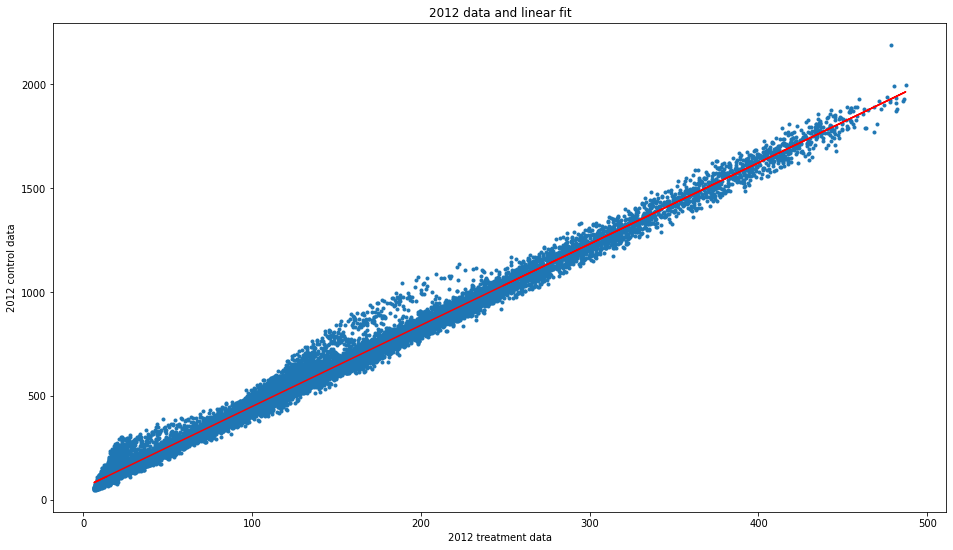

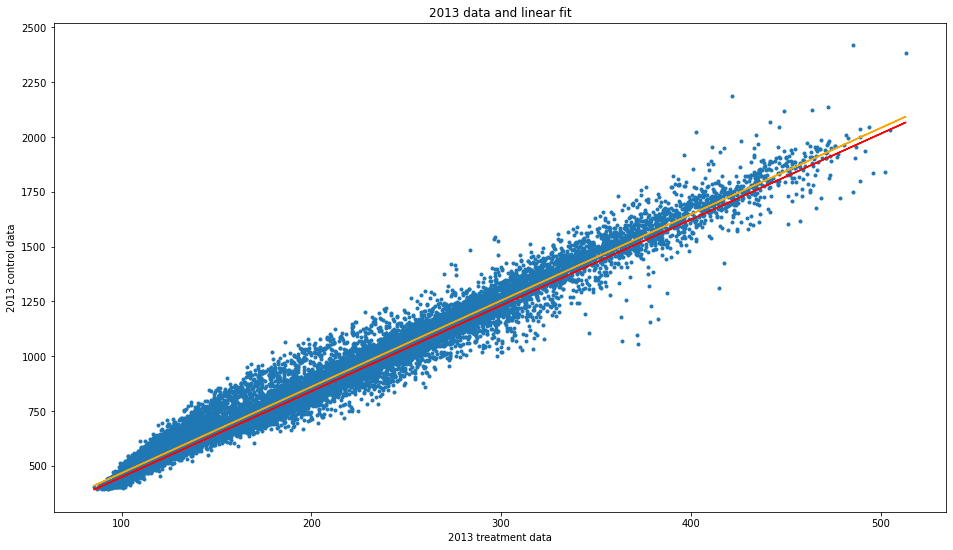

In [11]:
total_2012_treatment, total_2012_control = annual_consumption(total_usage_2012)
total_2013_treatment, total_2013_control = annual_consumption(total_usage_2013)

In [13]:
# this meants that the randomized control group and treatment group dont have the same 2012 baseline
print('control 2012 =', total_2012_control, ', treatment 2012 =', total_2012_treatment)
print('diff 2012 =', total_2012_control - total_2012_treatment)
print('fraction 2012 =', total_2012_control / total_2012_treatment)
print('control 2013 =', total_2013_control, ', treatment 2013 =', total_2013_treatment)
print('diff 2013 =', total_2013_control - total_2013_treatment)
print('fraction 2013 =', total_2013_control / total_2013_treatment)

control 2012 = 2292.116133578853 , treatment 2012 = 2092.0849945924842
diff 2012 = 200.03113898636866
fraction 2012 = 1.095613294633535
control 2013 = 3607.0439278325775 , treatment 2013 = 3327.7188423630273
diff 2013 = 279.32508546955023
fraction 2013 = 1.0839389079130255


In [15]:
normalization_factor = total_2012_control / total_2012_treatment

In [8]:
day_sum_2012 = household_mean_daily_consumption(total_usage_2012)
day_sum_2013 = household_mean_daily_consumption(total_usage_2013)

In [16]:
day_sum_2012_normalized = day_sum_2012.copy()
day_sum_2012_normalized[True] = day_sum_2012_normalized[True] * normalization_factor

day_sum_2013_normalized = day_sum_2013.copy()
day_sum_2013_normalized[True] = day_sum_2013_normalized[True] * normalization_factor

In [89]:
total_usage_2012_normalized.loc[total_usage_2012_normalized['treated'] == False, 'KWH/hh']

0           0.000
1           0.000
2           0.000
3           0.000
4           0.000
            ...  
48459552    0.065
48459553    0.063
48459554    0.046
48459555    0.068
48459556    0.057
Name: KWH/hh, Length: 48459557, dtype: float64

In [107]:
pd.Series(_93.T[0])

0           0.322524
1           0.322524
2           0.322524
3           0.322524
4           0.322524
              ...   
60404507    0.454437
60404508    1.375766
60404509    0.516271
60404510    0.397755
60404511    0.348288
Length: 60404512, dtype: float64

In [112]:
total_usage_2012

,house_id,treated,date_time,KWH/hh
0,MAC000002,False,2012-10-12 00:30:00,0.000
1,MAC000002,False,2012-10-12 01:00:00,0.000
2,MAC000002,False,2012-10-12 01:30:00,0.000
3,MAC000002,False,2012-10-12 02:00:00,0.000
4,MAC000002,False,2012-10-12 02:30:00,0.000
...,...,...,...,...
60404507,MAC005565,True,2012-06-21 05:00:00,0.128
60404508,MAC005565,True,2012-06-21 05:30:00,1.022
60404509,MAC005565,True,2012-06-21 06:00:00,0.188
60404510,MAC005565,True,2012-06-21 06:30:00,0.073


In [108]:
def normalize(X):
    return pd.Series(linear_regressor.predict(X.values.reshape(-1, 1)).T[0])

In [116]:
total_usage_2012_normalized = total_usage_2012.copy()
total_usage_2012_normalized.loc[total_usage_2012_normalized['treated'] == False, 'KWH/hh'] = normalize(total_usage_2012.loc[total_usage_2012['treated'] == False, 'KWH/hh'])
day_sum_2012_normalized = household_mean_daily_consumption(total_usage_2012_normalized)

total_usage_2013_normalized = total_usage_2013.copy()
total_usage_2013_normalized.loc[total_usage_2013_normalized['treated'] == False, 'KWH/hh'] = normalize(total_usage_2013.loc[total_usage_2013['treated'] == False, 'KWH/hh'])
day_sum_2013_normalized = household_mean_daily_consumption(total_usage_2013_normalized)

In [117]:
total_2012_treatment_normalized, total_2012_control_normalized = annual_consumption(total_usage_2012_normalized)
total_2013_treatment_normalized, total_2013_control_normalized = annual_consumption(total_usage_2013_normalized)

In [118]:
print('normalized control 2012 =', total_2012_control_normalized, ', normalized treatment 2012 =', total_2012_treatment_normalized)
print('normalized diff 2012 =', total_2012_control_normalized - total_2012_treatment_normalized)
print('normalized fraction 2012 =', total_2012_control_normalized / total_2012_treatment_normalized)
print('normalized control 2013 =', total_2013_control_normalized, ', normalized treatment 2013 =', total_2013_treatment_normalized)
print('normalized diff 2013 =', total_2013_control_normalized - total_2013_treatment_normalized)
print('normalized fraction 2013 =', total_2013_control_normalized / total_2013_treatment_normalized)

normalized control 2012 = 5889.463045221745 , normalized treatment 2012 = 2092.0849945924842
normalized diff 2012 = 3797.378050629261
normalized fraction 2012 = 2.815116527504634
normalized control 2013 = 9142.34181442921 , normalized treatment 2013 = 3327.7188423630273
normalized diff 2013 = 5814.622972066183
normalized fraction 2013 = 2.747330002175663


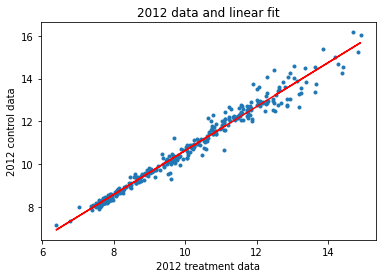

In [125]:
from sklearn.linear_model import LinearRegression

X = day_sum_2012[True].values.reshape(-1, 1)
Y = day_sum_2012[False].values.reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred_2012 = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y, marker='.')
plt.title("2012 data and linear fit")
plt.xlabel("2012 treatment data")
plt.ylabel("2012 control data")
plt.plot(X, Y_pred_2012, color='red')
plt.show()

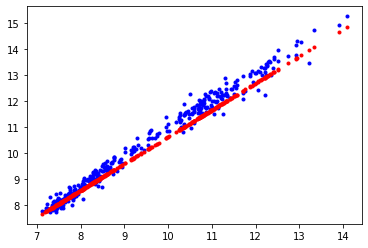

In [74]:
X = day_sum_2013[True].values.reshape(-1, 1)
Y = day_sum_2013[False].values.reshape(-1, 1)
Y_pred_2013 = linear_regressor.predict(X)

plt.scatter(X, Y, c='b', marker='.')
plt.scatter(X, Y_pred_2013, c='r', marker='.')
plt.show()

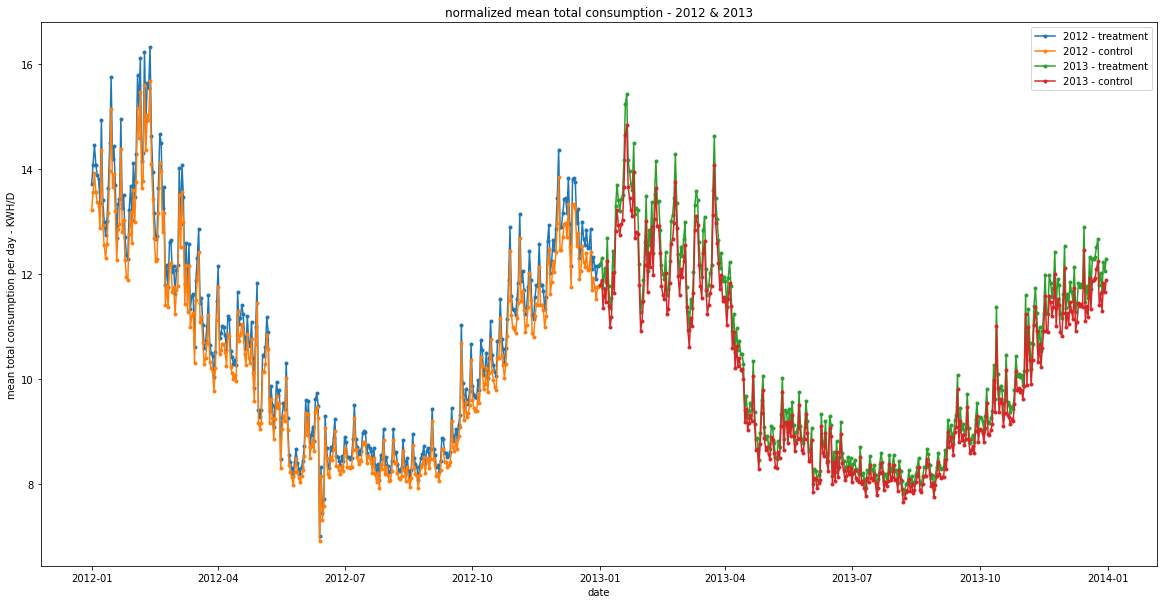

In [77]:
labels = ['2012 - treatment', '2012 - control', '2013 - treatment', '2013 - control']
title = 'normalized mean total consumption - 2012 & 2013'

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(day_sum_2012_normalized[True].index, day_sum_2012_normalized[True].values, label=labels[0], marker='.')
ax.plot(day_sum_2012_normalized[False].index, Y_pred_2012, label=labels[1], marker='.')
ax.plot(day_sum_2013_normalized[True].index, day_sum_2013_normalized[True].values, label=labels[2], marker='.')
ax.plot(day_sum_2013_normalized[False].index, Y_pred_2013, label=labels[3], marker='.')

ax.legend(loc=1); # upper left corner
ax.set_xlabel('date')
ax.set_ylabel('mean total consumption per day - KWH/D')
ax.set_title(title);

In [59]:
slope = linear_regressor.coef_[0][0]

1.0305700721228108

In [60]:
intercept = linear_regressor.intercept_[0]

0.32252385853201737

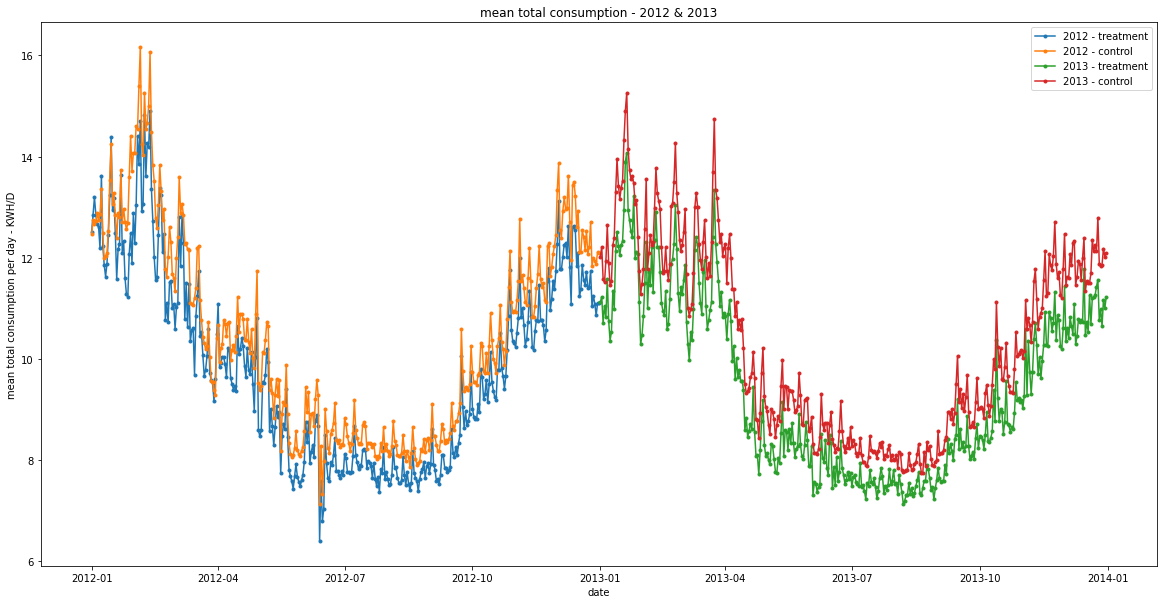

In [21]:
labels = ['2012 - treatment', '2012 - control', '2013 - treatment', '2013 - control']
title = 'mean total consumption - 2012 & 2013'
plot_1213(day_sum_2012, day_sum_2013, labels, title)

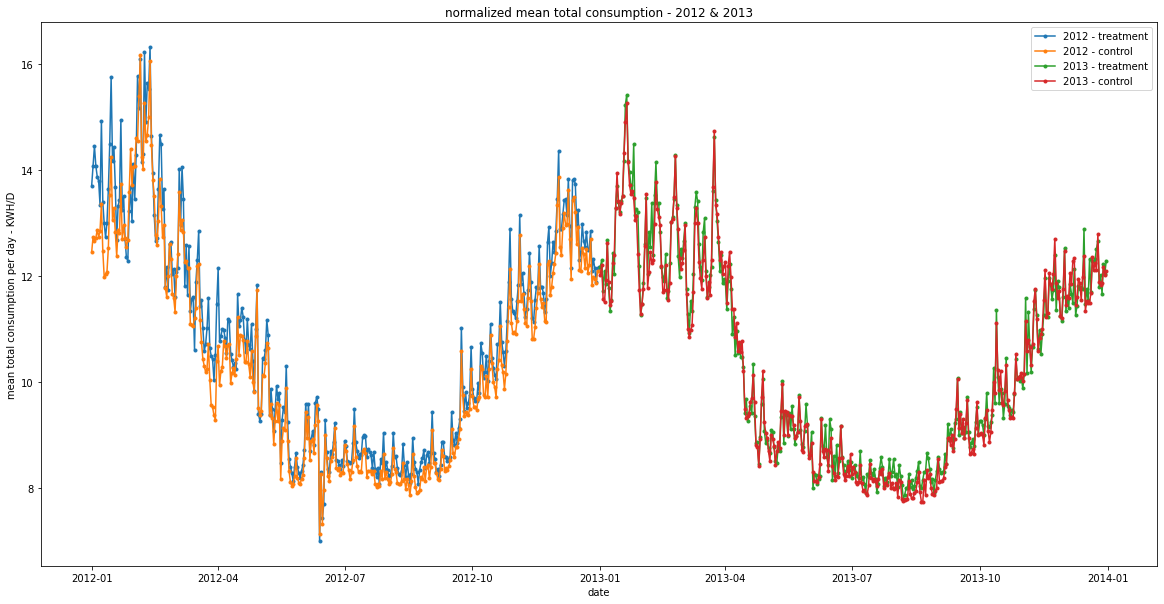

In [22]:
labels = ['2012 - treatment', '2012 - control', '2013 - treatment', '2013 - control']
title = 'normalized mean total consumption - 2012 & 2013'
plot_1213(day_sum_2012_normalized, day_sum_2013_normalized, labels, title)

In [32]:
acorn_2013 = pd.merge(total_usage_2013, total_acorn, how='left', on='house_id')
acorn_2012 = pd.merge(total_usage_2012, total_acorn, how='left', on='house_id')

In [33]:
affluent_2013 = get_consumption_demographic(acorn_2013, 'Affluent')
comfortable_2013 = get_consumption_demographic(acorn_2013, 'Comfortable')
adversity_2013 = get_consumption_demographic(acorn_2013, 'Adversity')

affluent_2012 = get_consumption_demographic(acorn_2012, 'Affluent')
comfortable_2012 = get_consumption_demographic(acorn_2012, 'Comfortable')
adversity_2012 = get_consumption_demographic(acorn_2012, 'Adversity')

In [34]:
affluent_2013_day_sum = household_mean_daily_consumption(affluent_2013)
comfortable_2013_day_sum = household_mean_daily_consumption(comfortable_2013)
adversity_2013_day_sum = household_mean_daily_consumption(adversity_2013)

affluent_2012_day_sum = household_mean_daily_consumption(affluent_2012)
comfortable_2012_day_sum = household_mean_daily_consumption(comfortable_2012)
adversity_2012_day_sum = household_mean_daily_consumption(adversity_2012)

In [35]:
acorn_2012_normalized = pd.merge(total_usage_2012_normalized, total_acorn, how='left', on='house_id')

affluent_2012_normalized = get_consumption_demographic(acorn_2012_normalized, 'Affluent')
comfortable_2012_normalized = get_consumption_demographic(acorn_2012_normalized, 'Comfortable')
adversity_2012_normalized = get_consumption_demographic(acorn_2012_normalized, 'Adversity')

affluent_2012_day_sum_normalized = household_mean_daily_consumption(affluent_2012_normalized)
comfortable_2012_day_sum_normalized = household_mean_daily_consumption(comfortable_2012_normalized)
adversity_2012_day_sum_normalized = household_mean_daily_consumption(adversity_2012_normalized)

In [36]:
acorn_2013_normalized = pd.merge(total_usage_2013_normalized, total_acorn, how='left', on='house_id')

affluent_2013_normalized = get_consumption_demographic(acorn_2013_normalized, 'Affluent')
comfortable_2013_normalized = get_consumption_demographic(acorn_2013_normalized, 'Comfortable')
adversity_2013_normalized = get_consumption_demographic(acorn_2013_normalized, 'Adversity')

affluent_2013_day_sum_normalized = household_mean_daily_consumption(affluent_2013_normalized)
comfortable_2013_day_sum_normalized = household_mean_daily_consumption(comfortable_2013_normalized)
adversity_2013_day_sum_normalized = household_mean_daily_consumption(adversity_2013_normalized)

In [39]:
affluent_2012_treatment_normalized, affluent_2012_control_normalized = annual_consumption(affluent_2012_normalized)
affluent_2013_treatment_normalized, affluent_2013_control_normalized = annual_consumption(affluent_2013_normalized)

comfortable_2012_treatment_normalized, comfortable_2012_control_normalized = annual_consumption(comfortable_2012_normalized)
comfortable_2013_treatment_normalized, comfortable_2013_control_normalized = annual_consumption(comfortable_2013_normalized)

adversity_2012_treatment_normalized, adversity_2012_control_normalized = annual_consumption(adversity_2012_normalized)
adversity_2013_treatment_normalized, adversity_2013_control_normalized = annual_consumption(adversity_2013_normalized)

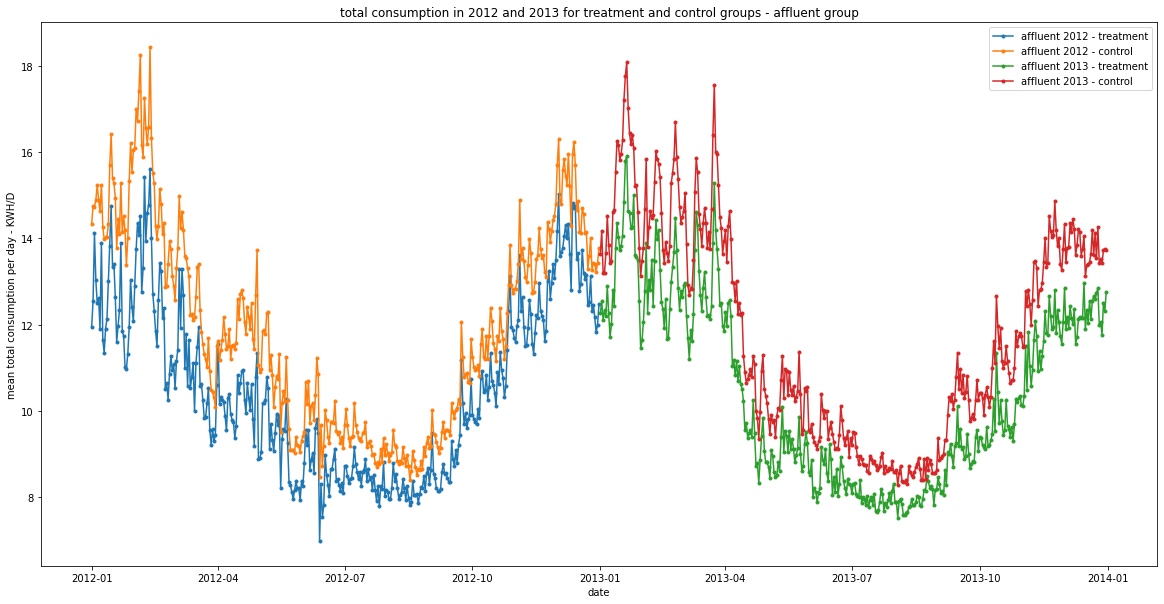

In [27]:
labels = ['affluent 2012 - treatment', 'affluent 2012 - control', 'affluent 2013 - treatment', 'affluent 2013 - control']
title = 'total consumption in 2012 and 2013 for treatment and control groups - affluent group'
plot_1213(affluent_2012_day_sum, affluent_2013_day_sum, labels, title)

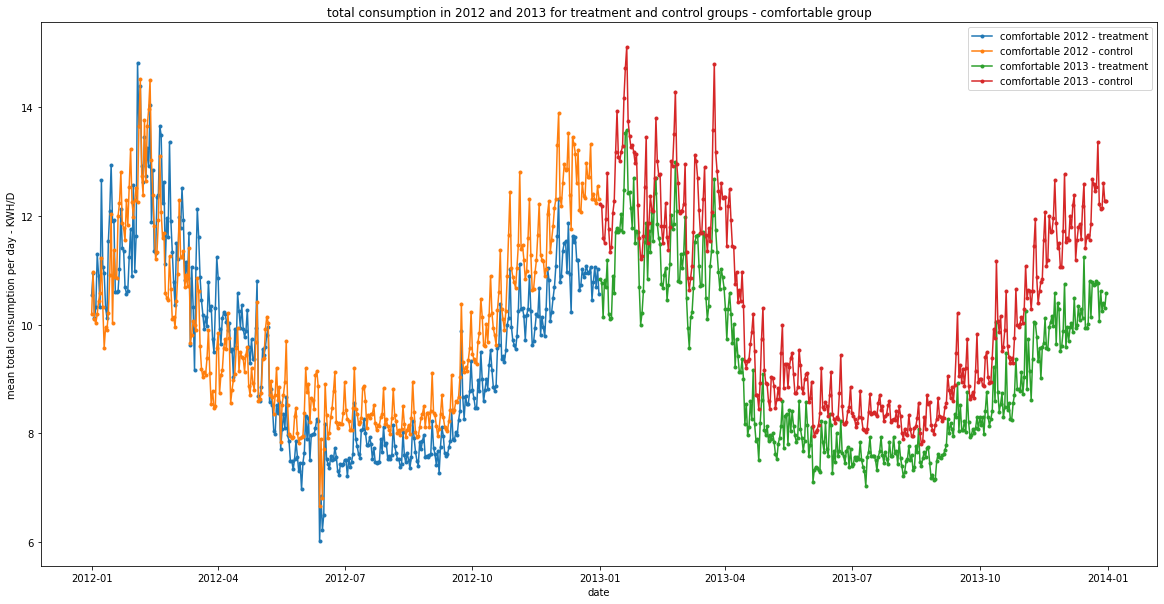

In [28]:
labels = ['comfortable 2012 - treatment', 'comfortable 2012 - control', 'comfortable 2013 - treatment', 'comfortable 2013 - control']
title = 'total consumption in 2012 and 2013 for treatment and control groups - comfortable group'
plot_1213(comfortable_2012_day_sum, comfortable_2013_day_sum, labels, title)

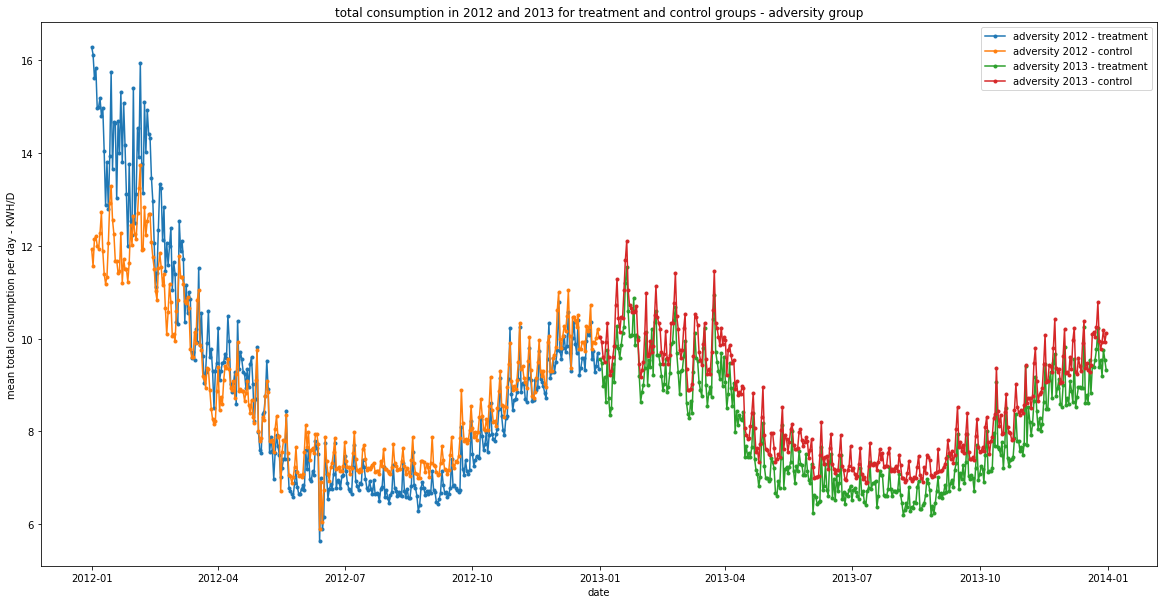

In [29]:
labels = ['adversity 2012 - treatment', 'adversity 2012 - control', 'adversity 2013 - treatment', 'adversity 2013 - control']
title = 'total consumption in 2012 and 2013 for treatment and control groups - adversity group'
plot_1213(adversity_2012_day_sum, adversity_2013_day_sum, labels, title)

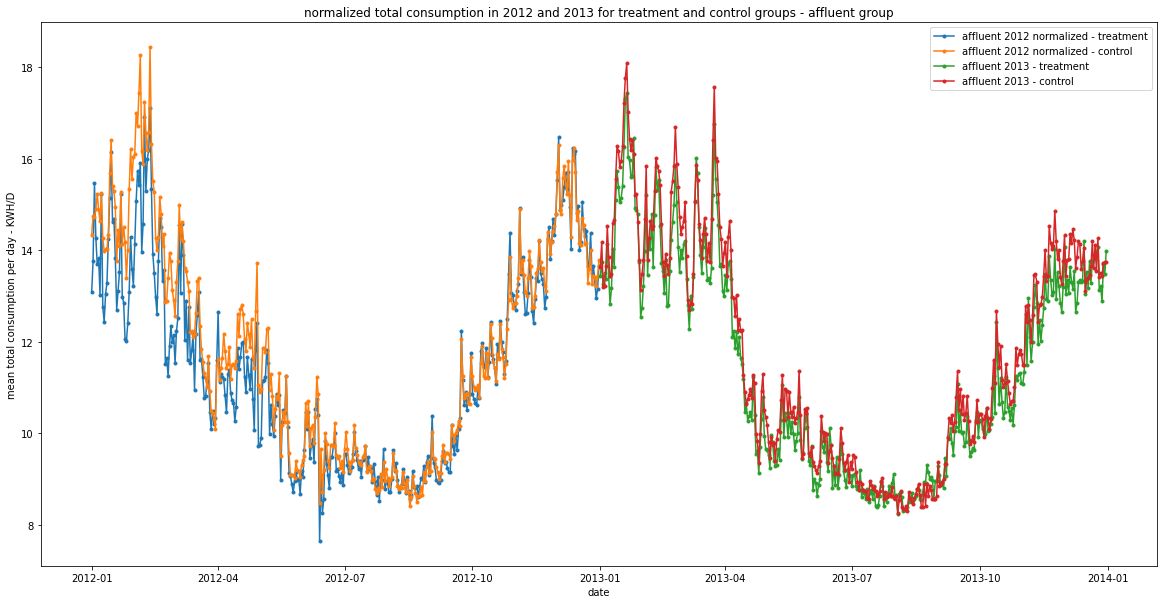

In [30]:
labels = ['affluent 2012 normalized - treatment', 'affluent 2012 normalized - control', 'affluent 2013 - treatment', 'affluent 2013 - control']
title = 'normalized total consumption in 2012 and 2013 for treatment and control groups - affluent group'
plot_1213(affluent_2012_day_sum_normalized, affluent_2013_day_sum_normalized, labels, title)

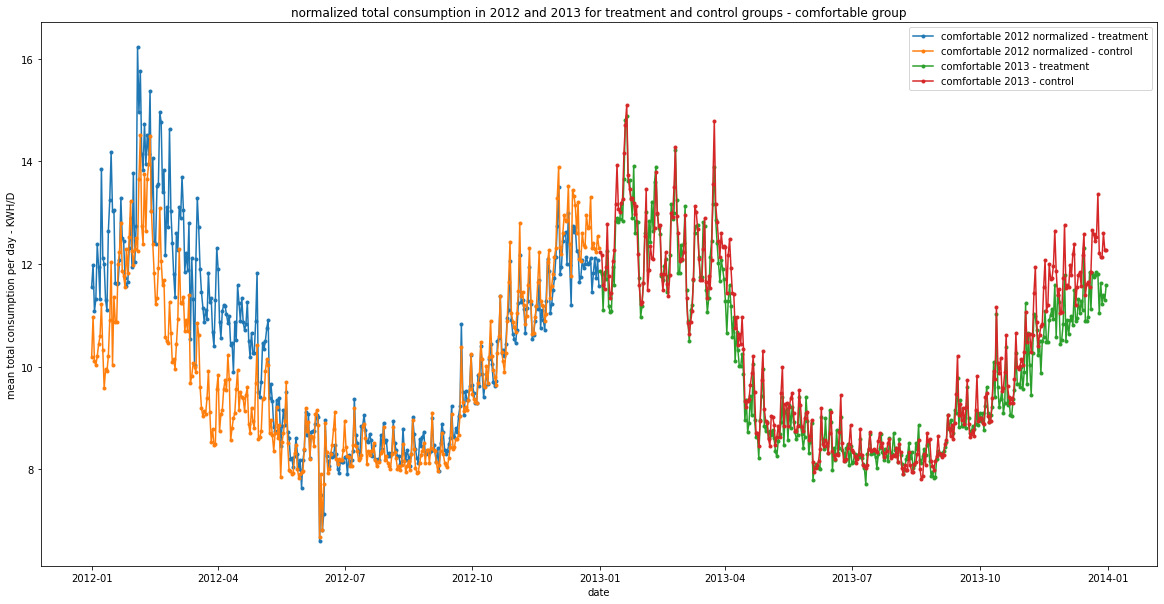

In [31]:
labels = ['comfortable 2012 normalized - treatment', 'comfortable 2012 normalized - control', 'comfortable 2013 - treatment', 'comfortable 2013 - control']
title = 'normalized total consumption in 2012 and 2013 for treatment and control groups - comfortable group'
plot_1213(comfortable_2012_day_sum_normalized, comfortable_2013_day_sum_normalized, labels, title)

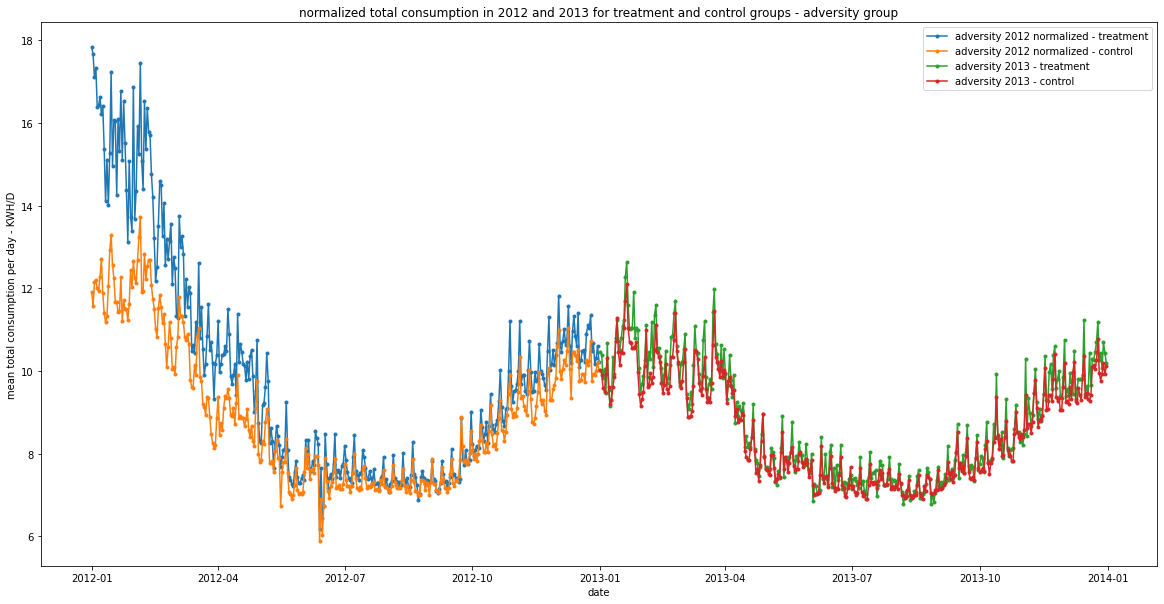

In [32]:
labels = ['adversity 2012 normalized - treatment', 'adversity 2012 normalized - control', 'adversity 2013 - treatment', 'adversity 2013 - control']
title = 'normalized total consumption in 2012 and 2013 for treatment and control groups - adversity group'
plot_1213(adversity_2012_day_sum_normalized, adversity_2013_day_sum_normalized, labels, title)

In [33]:
# First off let's see if the treatment resulted in full shift in consumption?

In [71]:
# tariff mapper maps date: time to p/kWh
# only for 2013: jan through dec
tariffs = pd.read_csv('~/Downloads/London-Power-Networks/tariffs_csv.csv', header=0, 
                      names=['date_time', 'tariff'])

# convert date_time from str to datetime
tariffs['date_time'] = tariffs['date_time'].astype('M8[ns]')

# A sub-set of 1,100 customers (Dynamic Time of Use or dToU) were given specific times when 
# their electricity tariff would be higher or lower price than normal – High (67.20p/kWh), 
# Low (3.99p/kWh) or normal (11.76p/kWh). The rest of the sample (around 4,500) were on a 
# flat rate of 14.228p/kWh.

tariffs['p/kWh'] = 0

# col[mask] = val

tariffs.loc[tariffs['tariff'] == 'High', 'p/kWh'] = 67.20
tariffs.loc[tariffs['tariff'] == 'Normal', 'p/kWh'] = 11.76
tariffs.loc[tariffs['tariff'] == 'Low', 'p/kWh'] = 3.99

# tariffs = tariffs.set_index('date_time')

tariffs.head()

,date_time,tariff,p/kWh
0,2013-01-01 00:00:00,Normal,11.76
1,2013-01-01 00:30:00,Normal,11.76
2,2013-01-01 01:00:00,Normal,11.76
3,2013-01-01 01:30:00,Normal,11.76
4,2013-01-01 02:00:00,Normal,11.76


In [75]:
type(total_usage_2013['date_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [76]:
type(tariffs['date_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [77]:
tariffs.merge(affluent_2013_ouail, how='right', on=['date_time'])

,date_time,tariff,p/kWh,house_id,treated,KWH/hh
0,2013-01-01 00:00:00,Normal,11.76,MAC000002,False,0.219
1,2013-01-01 00:00:00,Normal,11.76,MAC000003,False,1.966
2,2013-01-01 00:00:00,Normal,11.76,MAC000004,False,0.000
3,2013-01-01 00:00:00,Normal,11.76,MAC000006,False,0.000
4,2013-01-01 00:00:00,Normal,11.76,MAC000007,False,0.247
...,...,...,...,...,...,...
93087820,2013-12-31 23:30:00,Normal,11.76,MAC005549,True,0.183
93087821,2013-12-31 23:30:00,Normal,11.76,MAC005550,True,0.761
93087822,2013-12-31 23:30:00,Normal,11.76,MAC005551,True,0.314
93087823,2013-12-31 23:30:00,Normal,11.76,MAC005557,True,0.109


In [154]:
affluent_2013.head()

,house_id,treated,date_time,KWH/hh,acorn_group,acorn_category
0,MAC000002,False,2013-01-01 00:00:00,0.219,ACORN-A,Affluent
1,MAC000002,False,2013-01-01 00:30:00,0.241,ACORN-A,Affluent
2,MAC000002,False,2013-01-01 01:00:00,0.191,ACORN-A,Affluent
3,MAC000002,False,2013-01-01 01:30:00,0.235,ACORN-A,Affluent
4,MAC000002,False,2013-01-01 02:00:00,0.182,ACORN-A,Affluent


In [155]:
affluent_2013_ouail = affluent_2013.copy()
affluent_2013_ouail.loc[affluent_2013_ouail['treated'] == True, 'KWH/hh'] = affluent_2013_ouail['KWH/hh'] * 1.12956626869137
comfortable_2013_ouail = comfortable_2013.copy()
comfortable_2013_ouail.loc[comfortable_2013_ouail['treated'] == True, 'KWH/hh'] = comfortable_2013_ouail['KWH/hh'] * 1.0437749073127405
adversity_2013_ouail = adversity_2013.copy()
adversity_2013_ouail.loc[adversity_2013_ouail['treated'] == True, 'KWH/hh'] = adversity_2013_ouail['KWH/hh'] * 0.9880783149612313

In [156]:
affluent_2013_ouail = tariffs.merge(affluent_2013_ouail, how='right', on=['date_time'])
comfortable_2013_ouail = tariffs.merge(comfortable_2013_ouail, how='right', on=['date_time'])
adversity_2013_ouail = tariffs.merge(adversity_2013_ouail, how='right', on=['date_time'])

In [157]:
affluent_2013_ouail['p/hh'] = affluent_2013_ouail['p/kWh'] * affluent_2013_ouail['KWH/hh']
comfortable_2013_ouail['p/hh'] = comfortable_2013_ouail['p/kWh'] * comfortable_2013_ouail['KWH/hh']
adversity_2013_ouail['p/hh'] = adversity_2013_ouail['p/kWh'] * adversity_2013_ouail['KWH/hh']

In [158]:
affluent_2013_ouail = affluent_2013_ouail.groupby(
    [affluent_2013_ouail['date_time'].dt.normalize(), affluent_2013_ouail['house_id']]).sum().rename(columns={'p/hh': 'p/D'})
affluent_2013_ouail['treated'] = affluent_2013_ouail['treated'].astype('bool')
affluent_2013_ouail = affluent_2013_ouail.groupby([affluent_2013_ouail.index.get_level_values(0), 'treated']).mean()
affluent_2013_ouail = affluent_2013_ouail['p/D'].unstack()

In [159]:
comfortable_2013_ouail = comfortable_2013_ouail.groupby(
    [comfortable_2013_ouail['date_time'].dt.normalize(), comfortable_2013_ouail['house_id']]).sum().rename(columns={'p/hh': 'p/D'})
comfortable_2013_ouail['treated'] = comfortable_2013_ouail['treated'].astype('bool')
comfortable_2013_ouail = comfortable_2013_ouail.groupby([comfortable_2013_ouail.index.get_level_values(0), 'treated']).mean()
comfortable_2013_ouail = comfortable_2013_ouail['p/D'].unstack()

In [160]:
adversity_2013_ouail = adversity_2013_ouail.groupby(
    [adversity_2013_ouail['date_time'].dt.normalize(), adversity_2013_ouail['house_id']]).sum().rename(columns={'p/hh': 'p/D'})
adversity_2013_ouail['treated'] = adversity_2013_ouail['treated'].astype('bool')
adversity_2013_ouail = adversity_2013_ouail.groupby([adversity_2013_ouail.index.get_level_values(0), 'treated']).mean()
adversity_2013_ouail = adversity_2013_ouail['p/D'].unstack()

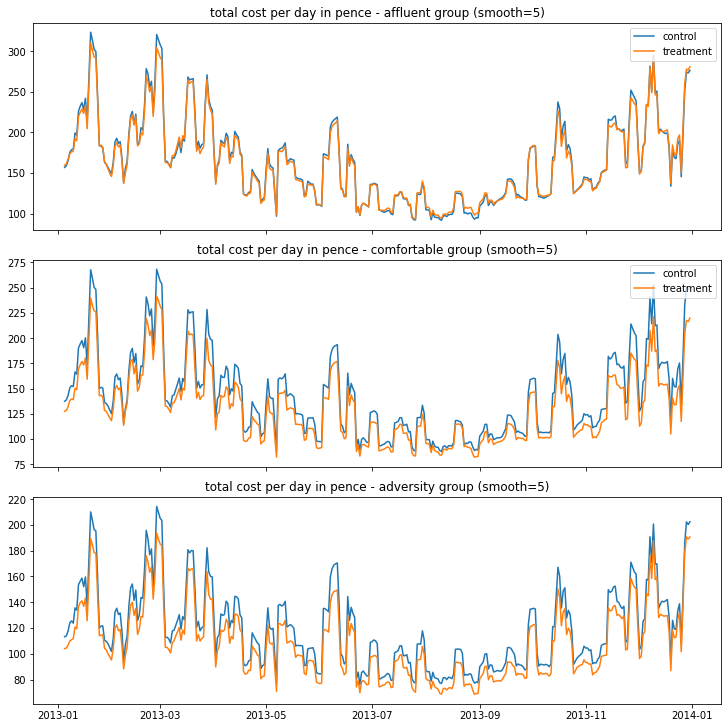

In [225]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, constrained_layout=True, figsize=(10, 10))
ax1.plot(affluent_2013_ouail.rolling(5).mean())
ax1.set_title('total cost per day in pence - affluent group (smooth=5)')
ax1.legend(['control', 'treatment'], loc=1)
ax2.plot(comfortable_2013_ouail.rolling(5).mean())
ax2.set_title('total cost per day in pence - comfortable group (smooth=5)')
ax2.legend(['control', 'treatment'], loc=1)
ax3.plot(adversity_2013_ouail.rolling(5).mean())
ax3.set_title('total cost per day in pence - adversity group (smooth=5)')
plt.savefig('costperday.png')
plt.show()

In [181]:
affluent_2013_ouail.sum()

treated
False    60288.295627
True     59705.498792
dtype: float64

In [244]:
x(affluent_2013_ouail)

(1.0097611919584581, 582.7968346851048, 0.98)

In [243]:
x(comfortable_2013_ouail)

(1.092692091871813, 4465.097911685465, 9.27)

In [184]:
affluent_2013_ouail.sum()

treated
False    60288.295627
True     59705.498792
dtype: float64

In [245]:
x(adversity_2013_ouail)

(1.095842374952141, 3826.8102709847954, 9.58)

In [231]:
comfortable_2013_ouail.sum()

treated
False    52636.390861
True     48171.292950
dtype: float64

In [242]:
def x(df):
    sum_ = df.sum()
    return sum_[False] / sum_[True], sum_[False] - sum_[True], round((sum_[False] - sum_[True]) / sum_[True] * 100, 2)